0 : Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4
1 : Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5
2 : Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7
3 : Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8
4 : Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9
5 : Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10
6 : Latch:_LA_269353065_PostbondEpoxyCoverageCheckData;_CEID15652.10
7 : Latch:_LA_269353101_PickProcessAvePickForce;_CEID15653.7
8 : Latch:_LA_269353102_PickProcessAveNeedleTopHeight;_CEID15653.8
9 : Sig:_BondProcess_PBIEpoxyCoverage_(post_Step)
10 : Latch:_LA_269353097_BondProcessAveBondForce;_CEID15652.6
11 : Latch:_LA_269353098_BondProcessAveBondZHeight;_CEID15652.7
12 : Latch:_LA_252314679_BondForceNotHighForceArray_ECRO;_CEID15652.8
13 : Latch:_LA_252314736_BondDistanceToBondPosition_ECRO;_CEID15652.9
14 : Latch:_LA_269353069_DiePlacementOnStripX;_CEID15652.11
15 : Latch:_LA_269353070_DiePlacementOnStripY;_CEID15652

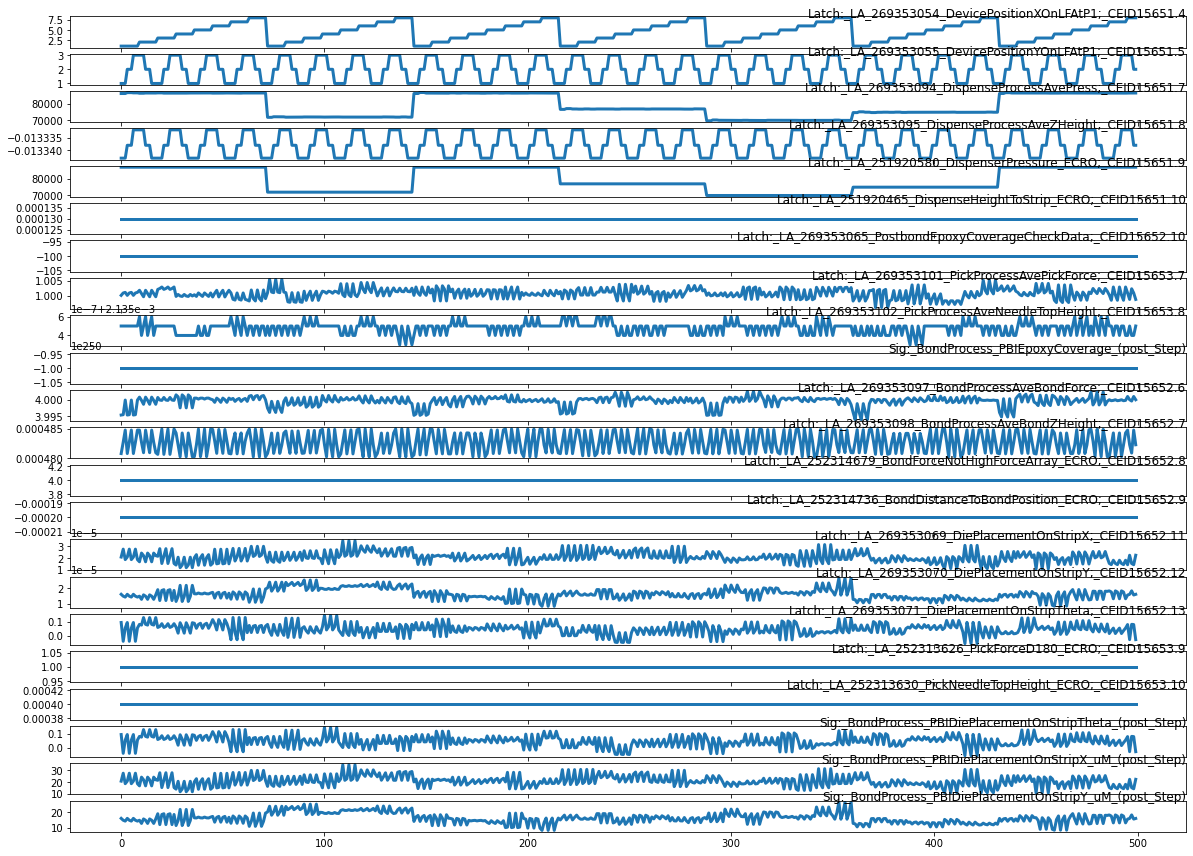

In [1]:
# Import the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,GRU, Input, ConvLSTM2D, Bidirectional,BatchNormalization
from tensorflow.keras import Input
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,Nadam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import math
import json,os
from IPython.core.pylabtools import figsize
FDC_path = r"E:\FDC\dataset"
figsize(10,10) 
#FDC_Data = pd.read_csv(r'E:\FDC\dataset\data2021.csv', sep=',')

import data_vis as dv
import importlib
importlib.reload(dv)




FDC_2021Data = dv.read_data(os.path.join(FDC_path,'data_all_exclude_miss.csv'))
Y_LIST = [1,2,3,4,5,6,18,19,20,21,22,23,24,25,26,27,28,29,30,35,36,37]

X_LIST = dv.find_coi(FDC_2021Data,Y_LIST)
FDC_2021Data = FDC_2021Data.drop(FDC_2021Data.iloc[:,X_LIST],axis=1)
dv.df_col_map(FDC_2021Data)

import data_vis as dv
import importlib
importlib.reload(dv)

dv.draw_trend(FDC_2021Data,groups=range(FDC_2021Data.shape[1]),bound=500)

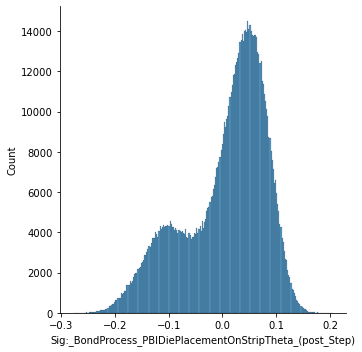

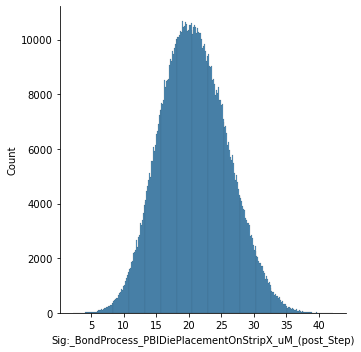

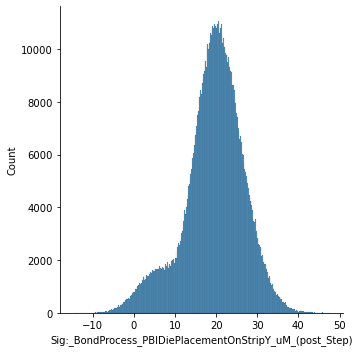

In [5]:
import seaborn as sns
sns.displot(FDC_2021Data.iloc[:,19])
sns.displot(FDC_2021Data.iloc[:,20])
sns.displot(FDC_2021Data.iloc[:,21])